#Predicting sentimets using Long- Short term Memory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/Final_Practicum/sentiment140'

All_Tweets_cleaned.csv	  senti_airline_naive_tfidf.ipynb
All_Tweets_cleaned.ipynb  Sentiment140_processing2.ipynb
All_Tweets.csv		  Sentiment_Analysis_Dataset.csv
AllTweets.csv		  Sentiment_cleaned.csv
LSTM_Base		  Tfidf_Naive
model.h5		  Tweets.ipynb


###Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


###Reading cleaned labelled dataet to train the model i.e. Sentiment140

In [4]:
data = pd.read_csv('/content/drive/My Drive/Final_Practicum/sentiment140/Sentiment_cleaned.csv', usecols=['cleaned_tweets', 'label'], encoding="UTF-8")
data['cleaned_tweets']=data['cleaned_tweets'].astype(str)
data.head(10)

,label,cleaned_tweets
0,1,opsi meant sayhope left arm ok drakardnoir
1,0,I want ice cream
2,1,Im happy right
3,1,I contribute probably HA
4,1,Heading practicete Have great day everyone
5,0,saturday night plan hasnt happen really long time
6,1,Hi Beck Im back Brisy Weekend good although wo...
7,0,My family say music depress beach Haha
8,1,pretty bore Just thinkin Haley Williams right ...
9,0,oh well thats good Mine kinda cold wish still ...


###Number of tweets labelled as Positive and Negative

Text(0.5, 1.0, 'Number of tweets labelled as Positive and Negative')

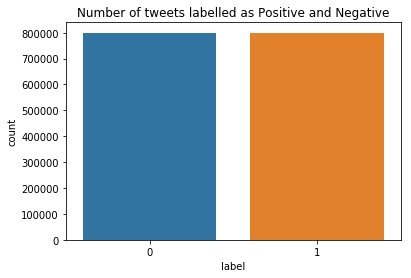

In [5]:
sns.countplot(data.label)
plt.xlabel('label')
plt.title('Number of tweets labelled as Positive and Negative')

In [0]:
X = data.cleaned_tweets
Y = data.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

###Split labelled dataset into train and test

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

###Tokenization using Keras tokenizer 

In [0]:
max_words = 10000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

###Defining layers of LSTM model

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

W0805 23:16:41.857857 140665410955136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 23:16:41.912921 140665410955136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 23:16:41.914711 140665410955136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 23:16:42.226871 140665410955136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 23:16:42.239718 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

###Traning the model

In [0]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 1087999 samples, validate on 272000 samples
Epoch 1/10
1087999/1087999 [==============================] - 3601s 3ms/step - loss: 0.4122 - acc: 0.8125 - val_loss: 0.4327 - val_acc: 0.7993
Epoch 2/10
1087999/1087999 [==============================] - 3597s 3ms/step - loss: 0.4101 - acc: 0.8143 - val_loss: 0.4375 - val_acc: 0.7987


###Tokenize the test data

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

###Evaluation of model using accuracy

In [0]:
accr = model.evaluate(test_sequences_matrix,Y_test)

240000/240000 [==============================] - 1091s 5ms/step


In [0]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.437
  Accuracy: 0.798


In [0]:
model.save("/content/drive/My Drive/Final_Practicum/sentiment140/model.h5")

In [0]:
from keras.models import load_model
model=load_model("/content/drive/My Drive/Final_Practicum/sentiment140/model.h5")

###Reading the cleaned election dataset

In [0]:
All_Tweets = pd.read_csv('/content/drive/My Drive/Final_Practicum/sentiment140/All_Tweets_cleaned.csv', encoding ='latin-1')
All_Tweets.columns=['tweet_id', 'full_text']

All_Tweets.head()

,tweet_id,full_text
0,1.101630e+18,Modi demonstrate Kashmir potentially flashpoin...
1,1.101630e+18,Vande mataram sir
2,1.101630e+18,You Like Jhansi Kiani For All Nationalist Indi...
3,1.101630e+18,If I run frm home still leave make battle life...
4,1.101630e+18,Meri oqat hai ki mein ek Indian hu teri oqat y...


In [0]:
All_Tweets['full_text']=All_Tweets['full_text'].astype(str)

###Creation of Feature Vector for election data

In [0]:
pred_sequences = tok.texts_to_sequences(All_Tweets['full_text'])
pred_sequences_matrix = sequence.pad_sequences(pred_sequences,maxlen=200)

###Sentiment Prediction on election data 

In [0]:
Sentiment_prediction = model.predict(pred_sequences_matrix)

In [0]:
Sentiment_prediction

array([[0.6644686 ],
       [0.81402016],
       [0.9576645 ],
       ...,
       [0.33861008],
       [0.8043156 ],
       [0.9503767 ]], dtype=float32)

In [0]:
labels = (Sentiment_prediction < 0.5).astype(np.int)
All_Tweets['sentiment']=pd.Series(labels.tolist())


In [0]:
print(All_Tweets.head())

       tweet_id                                          full_text sentiment
0  1.101630e+18  Modi demonstrate Kashmir potentially flashpoin...       [0]
1  1.101630e+18                                  Vande mataram sir       [0]
2  1.101630e+18  You Like Jhansi Kiani For All Nationalist Indi...       [0]
3  1.101630e+18  If I run frm home still leave make battle life...       [0]
4  1.101630e+18  Meri oqat hai ki mein ek Indian hu teri oqat y...       [0]


###Save the Predicted election data for Sentiment Analysis

In [0]:
All_Tweets.to_csv('/content/drive/My Drive/Final_Practicum/sentiment140/LSTM_Base/LSTM_Sentiment_Prediction.csv', header= True, index=False)